<a href="https://colab.research.google.com/github/KevinrealG/Series_de_tiempo/blob/main/03_SeriesdeTiempo_Topologicas_Finanzas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importar Librerias
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

In [ ]:
#Definir rangos de fechas
start = '2022-01-01'
end = '2023-11-30'

In [ ]:
tickets = ['SPOT','NFLX']
#['AAPL', 'MSFT', 'IBM', 'INTC', 'NVDA', 'GOOG', 'TSLA', 'PYPL', 'ORCL', 'AMZN', 'NFLX', 'QCOM', 'CSCO', 'SYMC']

https://finance.yahoo.com/quote/%5EIXIC?p=^IXIC&.tsrc=fin-srch

In [ ]:
prices = yf.download(tickets, start=start, end=end)['Adj Close']

[*********************100%%**********************]  2 of 2 completed


In [ ]:
if isinstance(prices, pd.Series):
    prices = prices.to_frame()

In [ ]:
#Calcular rendimientos logaritmicos
log_rtn =np.log(prices/prices.shift(1))
#Eliminando NaN generados en primera linea por calculo de Log_rtn
log_rtn = log_rtn.dropna()
log_rtn

,NFLX,SPOT
Date,,
2022-01-04,-0.010467,-0.020273
2022-01-05,-0.040794,-0.049522
2022-01-06,-0.025394,0.002500
2022-01-07,-0.022352,-0.020760
2022-01-10,-0.002239,0.003705
...,...,...
2023-11-22,0.006401,0.014005
2023-11-24,0.003258,0.002756
2023-11-27,-0.000814,0.007348


In [ ]:
#Identificar datos faltantes
print("Hay {} datos".format(len(log_rtn)))

for i in log_rtn.columns:
    missing_data_count = len(log_rtn[log_rtn[i].isna()])
    missing_data_percentage = np.round(missing_data_count / len(log_rtn) * 100, 2)

    print("Hay {} ({}%) datos faltantes en la columna {}".format(
        missing_data_count, missing_data_percentage, i
    ))

Hay 479 datos
Hay 0 (0.0%) datos faltantes en la columna NFLX
Hay 0 (0.0%) datos faltantes en la columna SPOT


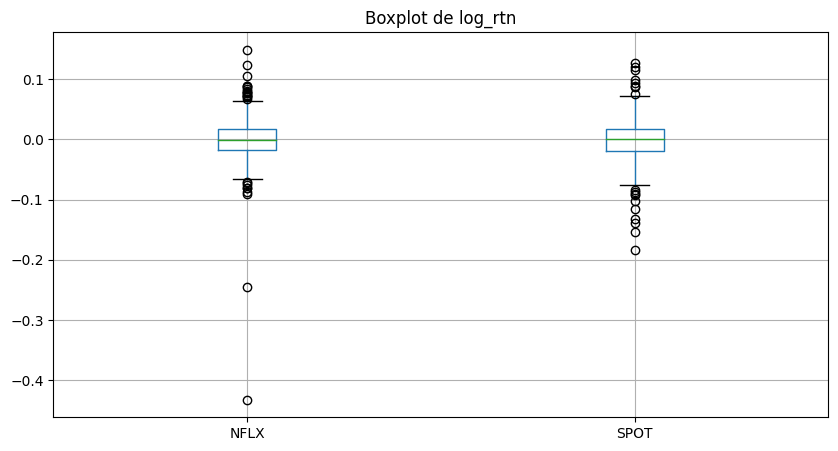

In [ ]:
#Identificacion de outliers
plt.figure(figsize=(10, 5))
log_rtn.boxplot(grid=True, fontsize=10)
plt.title('Boxplot de log_rtn', fontsize=12)
plt.show()

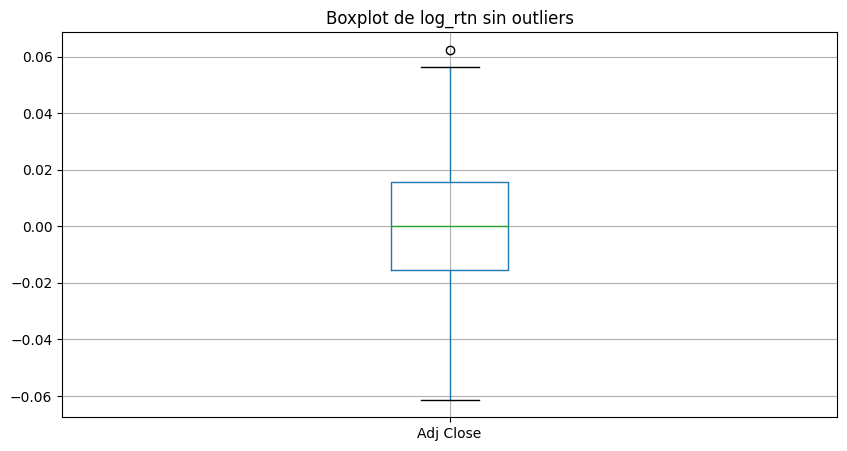

In [ ]:
def eliminar_outliers(df):
    # Calcular los límites para identificar outliers
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identificar y contar los outliers en cada columna
    outliers_count = (df < lower_bound) | (df > upper_bound)
    outliers_count = pd.DataFrame(outliers_count)  # Convertir a DataFrame

    # Eliminar los outliers del DataFrame
    df_sin_outliers = df[~outliers_count.any(axis=1)]

    return df_sin_outliers, outliers_count

def aplicar_eliminar_outliers(df):
    df_sin_outliers, _ = eliminar_outliers(df)
    return df_sin_outliers

dataclean, _ = eliminar_outliers(log_rtn)

# Visualizar el boxplot del DataFrame sin outliers
plt.figure(figsize=(10, 5))
dataclean.boxplot(grid=True, fontsize=10)
plt.title('Boxplot de log_rtn sin outliers', fontsize=12)
plt.show()

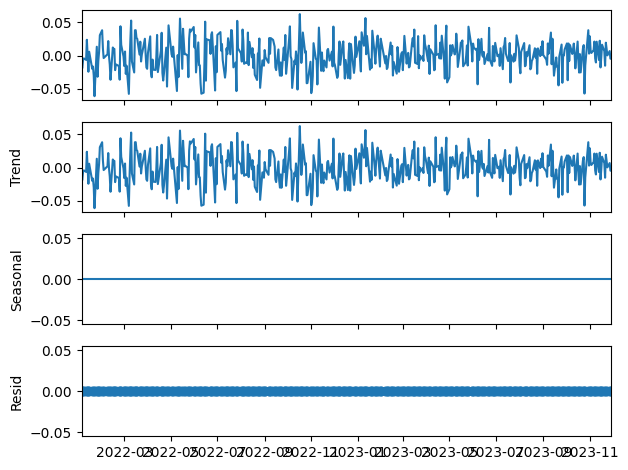

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
result1 = seasonal_decompose(pd.DataFrame(dataclean), model='additive', period=1)
result1.plot()
plt.savefig("descomposicion1.pdf",dpi=250,bbox_inches="tight")
plt.show()